In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('/content/drive/My Drive/Occupancy')

In [3]:
os.listdir()

['Task 10.ipynb',
 'Task 2.ipynb',
 'Task 4.ipynb',
 'Task 3.ipynb',
 'Task 9.ipynb',
 'Task 1.ipynb',
 'Task 12.ipynb',
 'Task 5.ipynb',
 'occupancy.csv',
 'Task 11.ipynb',
 'Task 13.ipynb',
 'Task 8.ipynb',
 'model-selection-triple.jpg',
 'Task 6.ipynb',
 'Task 7.ipynb',
 '.ipynb_checkpoints']

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
import numpy as np
import yellowbrick as yb

warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
#Data to show why Visuals matter - to aid in selection of final algo used
#data
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])



# verify the summary statistics
pairs = (x, y1), (x, y2), (x, y3), (x4, y4)
for x, y in pairs:
    print('mean=%1.2f, std=%1.2f, r=%1.2f' % (np.mean(y), np.std(y),
          np.corrcoef(x, y)[0][1]))

mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82
mean=7.50, std=1.94, r=0.82


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

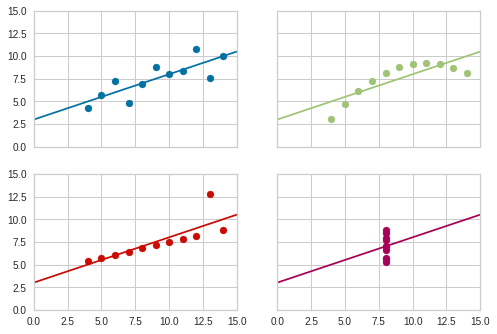

In [6]:
#visualize
g = yb.anscombe()
plt.show()


In [7]:
# Load the classification data set
data = pd.read_csv('occupancy.csv')
data.head()

,datetime,temperature,relative humidity,light,C02,humidity,occupancy
0,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
1,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
3,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
4,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [0]:
# Specify the features of interest
features = ["temperature", "relative humidity", "light", "C02", "humidity"]
classes = ['unoccupied', 'occupied']

In [0]:
# Extract the instances and target

# from yellowbrick.datasets import load_occupancy

# X, y = load_occupancy()
X = data[features]
y = data.occupancy

In [23]:
X.head()

,temperature,relative humidity,light,C02,humidity
0,23.18,27.2720,426.0,721.25,0.004793
1,23.15,27.2675,429.5,714.00,0.004783
2,23.15,27.2450,426.0,713.50,0.004779
3,23.15,27.2000,426.0,708.25,0.004772
4,23.10,27.2000,426.0,704.50,0.004757


In [10]:
pip install yellowbrick==1.1

In [0]:
from yellowbrick.contrib import ScatterVisualizer
from yellowbrick.datasets import load_occupancy

# # Load the classification dataset
# X, y = load_occupancy()

# # Specify the target classes
# classes = ["unoccupied", "occupied"]

# # Instantiate the visualizer
# visualizer = ScatterVisualizer(x="light", y="CO2", classes=classes)

# visualizer.fit(X, y)           # Fit the data to the visualizer
# visualizer.transform(X)        # Transform the data
# visualizer.show()      

In [0]:
from yellowbrick.features.radviz import RadViz

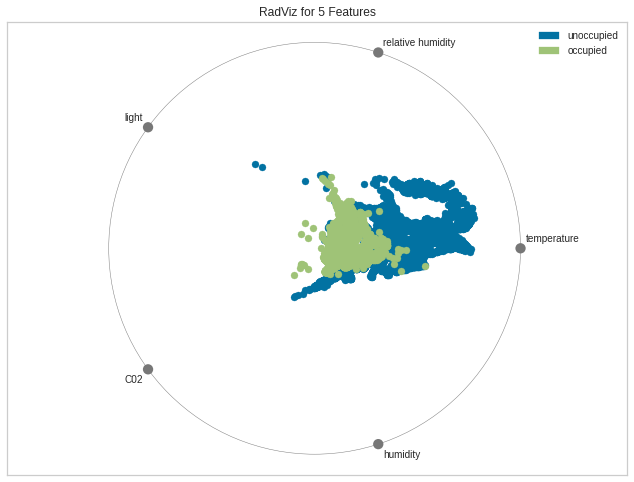

In [16]:
# Instantiate the visualizer
visualizer = RadViz(classes=classes, features=features, size=(800, 600))

# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
visualizer.poof()

In [0]:
from yellowbrick.features.pcoords import ParallelCoordinates



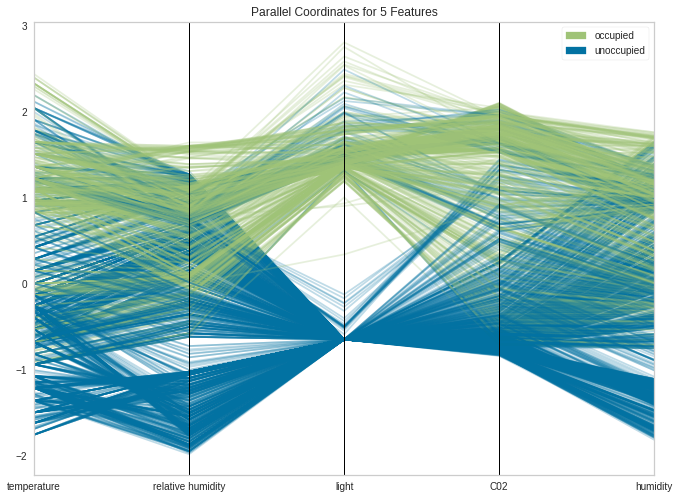

In [25]:
visualizer = ParallelCoordinates(
    classes = classes,
    features = features,
    normalize = 'standard',
    sample = 0.1,
    size = (800, 600)
)


visualizer.fit(X, y)

visualizer.transform(X)
visualizer.poof()

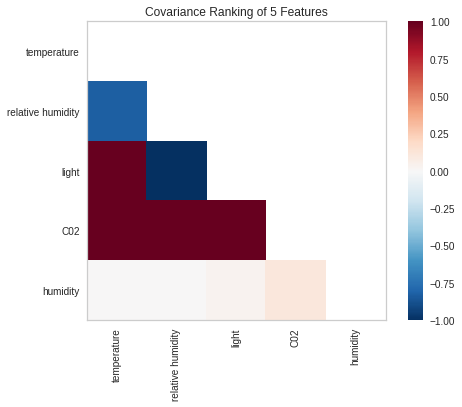

In [26]:
#Ranking the features - Covariance algorithm
from yellowbrick.features.rankd import Rank2D
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()      


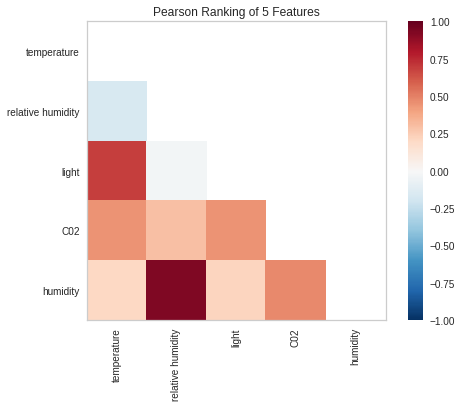

In [28]:
from yellowbrick.features.rankd import Rank2D  #Pearson linear algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()     

#These 2 methods are used to enhance feature selection
#Used to check for various cross correlations, collinearities etc amongst the features

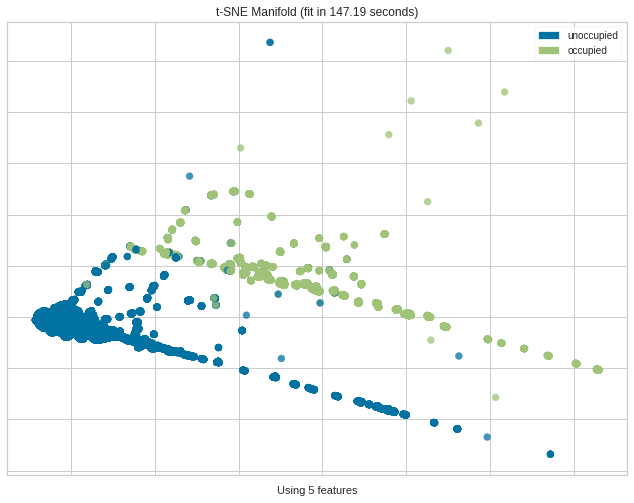

In [32]:
from yellowbrick.features.manifold import Manifold

visualizer = Manifold(
    manifold = 'tsne',
    target = 'discrete',
    classes = classes,
    size = (800, 600)
)

visualizer.fit_transform(X, y)
visualizer.poof()